# Вежба 1: Pytorch тензори и операции врз нив




Ја вчитуваме библиотеката и ја печатиме верзијата која ја користиме

In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


Креираме тензор иницијализиран со вредности



In [ ]:
tensor = torch.Tensor([[[1,3],[3,5],[5,7]],[[7,9],[9,2],[2,4]]])


torch.Size([2, 3, 2])

Доколку сакаме да креираме тензор со димензии 2x2 со 4 неодредени вредности ја користиме следнава команда

In [ ]:
tensor_neinicijaliziran = torch.Tensor(2,2)

Бројот на елементи е 4.

In [ ]:
torch.numel(tensor_neinicijaliziran)

4

Можеме тензорот да го иницијализираме со случајни вредности на следниов начин

In [ ]:
tensor_inicijaliziran = torch.randn(3,2)
tensor_inicijaliziran

tensor([[ 0.7165, -0.2445],
        [ 0.8064,  2.4885],
        [ 0.4051,  0.5806]])

Тензорот може да го иницијализираме и со вредности од даден податочен тип: int, long, byte

In [ ]:
tensor_int = torch.randn(4,4).type(torch.IntTensor)
tensor_int

tensor([[-1,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 1,  1,  0,  0],
        [-1,  0,  0,  0]], dtype=torch.int32)

In [ ]:
tensor_long = torch.LongTensor(2,2)
tensor_long

tensor([[     94569881174080,                  24],
        [       493921239039, 7589460822929338228]])

In [ ]:
Можеме да креираме и 1D тензор со 5 елементи и сите со вредност 1/0

In [ ]:
tensor_edinici = torch.ones(5)
tensor_edinici
tensor_nuli = torch.zeros(5)
tensor_nuli

tensor([0., 0., 0., 0., 0.])

Можеме да креираме матрица каде елементите од главната дијагонала имаат вредност 1 на следниов начин

In [ ]:
tensor_eye = torch.eye(3)
tensor_eye

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

За да ги добиеме индексите на елементите кои не се нула го користиме методот nonzero

In [ ]:
non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2]])

Доколку сакаме да креираме тензор од единици со ист облик како некој друг тензор користиме

In [ ]:
tensor_ones_shape_eye = torch.ones_like(tensor_eye)
tensor_ones_shape_eye

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

За модификација на даден тензор може да користиме in-place операциии (се користат методи со _) кои го менуваат самиот тензор

In [ ]:
inicijalen_tensor = torch.rand(2,2)
inicijalen_tensor.fill_(3)

tensor([[3., 3.],
        [3., 3.]])

Да изведеме математичка операција врз inicijalen_tensor. Може да приметиме дека оваа е out-of-place операција бидејќи не го модификува постоечкит тензор, туку креира нов тензор

In [ ]:
nov_tensor = inicijalen_tensor.add(4)
nov_tensor

tensor([[7., 7.],
        [7., 7.]])

Истата операција можеме да ја направиме и in-place

In [ ]:
inicijalen_tensor.add_(4)
inicijalen_tensor

tensor([[7., 7.],
        [7., 7.]])

Многу лесно можеме да креираме тензор од numpy поле на следниов начин

In [ ]:
import numpy as np
arr = np.array([5, 6, 7])
arr

array([5, 6, 7])

In [ ]:
tensor = torch.from_numpy(arr)
tensor

tensor([5, 6, 7])

Дополнително, можеме тензорот да го претвориме во numpy поле на следниов начин

In [ ]:
numpy_od_tensor = tensor.numpy()
numpy_od_tensor

array([5, 6, 7])

Можеме да го промениме вториот елемент во numpy полето на следниов начин

In [ ]:
arr[1]=3
arr

array([5, 3, 7])

Сега ако ги испечатите вредностите на тензорот погледнете ги вредностите. Што заклучувате? Дали овие две променливи делат иста меморија?

In [ ]:
tensor

tensor([5, 3, 7])

In [ ]:
numpy_od_tensor

array([5, 3, 7])

До елементите на еден тензор може да пристапиме слично како кај NumPy полиња. Во следниов пример пристапуваме до елементот од редот со индекс 1 и колоната со индекс 2

In [ ]:
inicijalen_tensor = torch.rand(2,3)
inicijalen_tensor[1,2]

tensor(0.6206)

Да ги земеме елементите од сите редици и од колоните со почетен индекс 1 и поголем

In [ ]:
inicijalen_tensor[:,1:]

tensor([[0.0617, 0.3150],
        [0.3605, 0.6206]])

Можеме да ги видиме димензиите на тензорот

In [ ]:
inicijalen_tensor.size() #metod
inicijalen_tensor.shape #својство

torch.Size([2, 3])

Можеме да креирам тензор со истите вредности како inicijalen_tensor, но со различни димензии. Примерот, од оригиналниот 2D тензор креира 1D тензор со 6 елементи.


In [ ]:
promenet_tensor = inicijalen_tensor.view(6)
promenet_tensor

tensor([0.1654, 0.0617, 0.3150, 0.3073, 0.3605, 0.6206])

Ако промените елемент во оригиналниот тензор, ќе се примени и вредноста на елементот во promenet_tensor

In [ ]:
inicijalen_tensor[1,2]=0
promenet_tensor

tensor([0.1654, 0.0617, 0.3150, 0.3073, 0.3605, 0.0000])

Исто така можеме да ги промениме димензиите на даден тензор со тоа што ќе ја специфицираме само едната димензија, а другата ќе ја поставиме на -1

In [ ]:
promeneta_matrica = inicijalen_tensor.view(-1,2)
promeneta_matrica.shape

torch.Size([3, 2])

Разгледајте ја грешката во наредниот код и објаснете зошто се случила

In [ ]:
promeneta_matrica = inicijalen_tensor.view(-1,5)
promeneta_matrica.shape

RuntimeError: ignored

Дополнително, можеме да ги подредиме вредностите на даден тензор по посакуваната димензија. Сортирањето предодредено е во рамки на редица по растечки редослед

In [ ]:
sortiran_tenzor, sortirani_indeksi = torch.sort(inicijalen_tensor)
sortiran_tenzor

tensor([[0.0617, 0.1654, 0.3150],
        [0.0000, 0.3073, 0.3605]])

In [ ]:
sortirani_indeksi

tensor([[1, 0, 2],
        [2, 0, 1]])

Да извршиме сортирање во рамки на колони

In [ ]:
sortiran_tenzor, sortirani_indeksi = torch.sort(inicijalen_tensor, dim=0)
sortiran_tenzor

tensor([[0.1654, 0.0617, 0.0000],
        [0.3073, 0.3605, 0.3150]])

In [ ]:
sortirani_indeksi

tensor([[0, 0, 1],
        [1, 1, 0]])


# Вежба 2: Autograd во Pytorch

Креираме случајни вредности за x, каде y = 20*x + 5 (станува збор за линеарен модел)

In [28]:
import torch
import numpy as np
import random
x = torch.tensor(np.arange(1,100,1))
y = (x*20+5+random.randint(-2,3)).reshape(-1)
print("shape of x: ",x.shape)
print("shape of y: ",y.shape)

shape of x:  torch.Size([99])
shape of y:  torch.Size([99])


Правиме иницијализација на тежинити и bias го нагодуваме на нула. Го нагодуваме require_grad да биде true

In [33]:
w = torch.tensor(0.,requires_grad=True)
b = torch.tensor(0.,requires_grad=True)

In [34]:
epochs = 100 #бројот на итерации е 100

Дефинираме forward јамка, каде ги правиме предвидувањата, ја пресметуваме загубата, пресметуваме извод на загубата во однос на W и b, за да го пресметаме градиентот и ги ажурираме параметрите. Ова го правиме 100 пати

In [35]:
losses = []
learning_rate = 0.0001
for i in range(epochs):
  #ги правиме предвидувањата
  y_pred = ((x*w)+b)
  y_pred.reshape(-1)
 
  #ја пресметуваме загубат
  loss = torch.square(y_pred - y).mean()
  losses.append(loss)
  #gradient descent
  loss.backward()
  with torch.no_grad():
    w  -= w.grad*learning_rate
    b  -= b.grad*learning_rate
  w.grad.zero_()
  b.grad.zero_()
#ја печатиме загубата
  print(loss)


tensor(1342730.6250, grad_fn=<MeanBackward0>)
tensor(152067.6719, grad_fn=<MeanBackward0>)
tensor(17233.5410, grad_fn=<MeanBackward0>)
tensor(1964.5060, grad_fn=<MeanBackward0>)
tensor(235.3959, grad_fn=<MeanBackward0>)
tensor(39.5849, grad_fn=<MeanBackward0>)
tensor(17.4098, grad_fn=<MeanBackward0>)
tensor(14.8972, grad_fn=<MeanBackward0>)
tensor(14.6114, grad_fn=<MeanBackward0>)
tensor(14.5777, grad_fn=<MeanBackward0>)
tensor(14.5726, grad_fn=<MeanBackward0>)
tensor(14.5709, grad_fn=<MeanBackward0>)
tensor(14.5695, grad_fn=<MeanBackward0>)
tensor(14.5679, grad_fn=<MeanBackward0>)
tensor(14.5665, grad_fn=<MeanBackward0>)
tensor(14.5651, grad_fn=<MeanBackward0>)
tensor(14.5637, grad_fn=<MeanBackward0>)
tensor(14.5622, grad_fn=<MeanBackward0>)
tensor(14.5607, grad_fn=<MeanBackward0>)
tensor(14.5593, grad_fn=<MeanBackward0>)
tensor(14.5580, grad_fn=<MeanBackward0>)
tensor(14.5566, grad_fn=<MeanBackward0>)
tensor(14.5551, grad_fn=<MeanBackward0>)
tensor(14.5536, grad_fn=<MeanBackward0>)
t

Ги печатиме финалните вредноста на W и b

In [36]:
print(w.item(),b.item())

20.115468978881836 0.3410821855068207


**Заклучок**: Ја искористивме Autograd функцијата за да ги одредиме параметрите W и b на овој линеарен модел

# Вежба 3: LSTM во Pytorch

Проблемот кој ќе го решаваме во овој пример е предвидување на бројот на патници на месечно ниво. Односно, доколку е дадена годината и месецот, треба да го предвидиме бројот во илјади.
Најпрвин го симнуваме податочното множество

In [37]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-10-30 20:55:20--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2021-10-30 20:55:20 (46.1 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



Потоа го вчитуваме и го прикажуваме истото

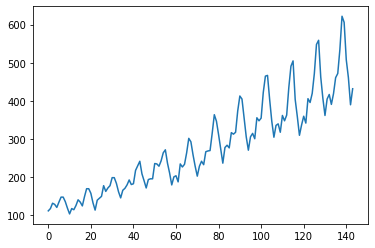

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
training_set = pd.read_csv('airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,1:2].values

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(training_set, label = 'Airline Passangers Data')
plt.show()

Креираме податочно множество за тренирање и тестирање. Прозорецот кој го користиме е 4 месеци.

In [44]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

Го креираме LSTM моделот

In [45]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

Дефинираме 2000 епохи и LSTM со еден влезен параметар, со еден слој и една класа на предвидување. Како функција на грешка користиме Mean Square Error. Погледнете како моделот ја намлува грешката при тренирање. 

In [46]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.12888
Epoch: 100, loss: 0.01073
Epoch: 200, loss: 0.00288
Epoch: 300, loss: 0.00256
Epoch: 400, loss: 0.00231
Epoch: 500, loss: 0.00209
Epoch: 600, loss: 0.00191
Epoch: 700, loss: 0.00180
Epoch: 800, loss: 0.00176
Epoch: 900, loss: 0.00174
Epoch: 1000, loss: 0.00172
Epoch: 1100, loss: 0.00169
Epoch: 1200, loss: 0.00168
Epoch: 1300, loss: 0.00168
Epoch: 1400, loss: 0.00167
Epoch: 1500, loss: 0.00166
Epoch: 1600, loss: 0.00164
Epoch: 1700, loss: 0.00162
Epoch: 1800, loss: 0.00160
Epoch: 1900, loss: 0.00158


Во следниов код вршиме евалуација на моделот

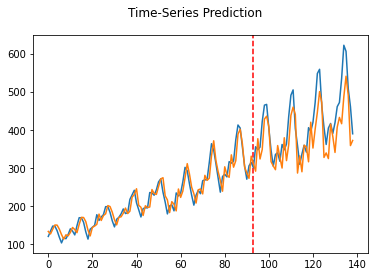

In [47]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
  dataY_plot = dataY.data.numpy()

  data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

# Вежба 4: CNN во PyTorch

Во следниов дел ќе ги прикажеме следниве делови:
1. Вчитување и нормализација на CIFAR10 податочното множество со користење на torchvision
2. Дефинирање на конволуциска невронска мрежа
3. Дефинирање на функција на загуба
4. Тренирање на мрежата
5. Евалуација на моделот



1. Вчитување и нормализација на CIFAR10 податочното множество со користење на torchvision
 - Излезот на torchvision податочното множество се PILImage слики во рангот [0, 1]. Истите ги трансформираме во тензори со нормализиран ранг од  [-1, 1].

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Да прикажеме некои од сликите

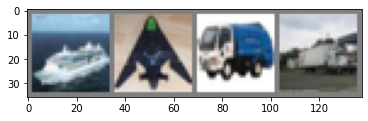

 ship plane truck truck


In [49]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. Дефинирање на конволуциска невронска мрежа

In [59]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #сликите се 3 канални
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # ги израмнуваме сите димензии освен batch диммензијата
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Дефинираме функција на загуба од типот Cross Entropy и оптимизатор SGD со моментум

In [60]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Тренирање на мрежата

In [61]:
for epoch in range(2):  # Ги изминуваме податочното множество неколку пати

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Се добиваат влезовите; податоците се листа од [inputs, labels]
        inputs, labels = data

        # Градиентите на параметрите ги нагодуваме на нула
        optimizer.zero_grad()

        # forward премин + backward премин + оптимизација
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # печатење на статистиките
        running_loss += loss.item()
        if i % 2000 == 1999:    # се печати на секои 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.157
[1,  4000] loss: 1.839
[1,  6000] loss: 1.694
[1,  8000] loss: 1.608
[1, 10000] loss: 1.546
[1, 12000] loss: 1.495
[2,  2000] loss: 1.418
[2,  4000] loss: 1.411
[2,  6000] loss: 1.364
[2,  8000] loss: 1.369
[2, 10000] loss: 1.313
[2, 12000] loss: 1.298
Finished Training


5. Тестирање на моделот
- прикажуваме една слика од тест множеството

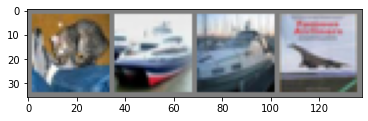

GroundTruth:    cat  ship  ship plane


In [62]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Следниов код покажува како би го вчитувале сниманиот модел од PATH Патеката. Во нашиов случај го имаме моделот во меморија и овој код не го извршуваме

In [ ]:
#net = Net()
#net.load_state_dict(torch.load(PATH))

Да видиме што предвидува моделот

In [63]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat truck   cat   cat


Да видиме како предвидува моделот на целото тест податочно множество. Имајте во предви дека доколку предвидуваме случајно прецисноста ви била 10% (100 поделено со бројот на класи, кој во нашиов случај е 10)

In [64]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Да ги видиме резултатите по класи

In [65]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 53.6 %
Accuracy for class car   is: 76.7 %
Accuracy for class bird  is: 19.6 %
Accuracy for class cat   is: 30.9 %
Accuracy for class deer  is: 50.7 %
Accuracy for class dog   is: 52.8 %
Accuracy for class frog  is: 69.0 %
Accuracy for class horse is: 59.7 %
Accuracy for class ship  is: 61.7 %
Accuracy for class truck is: 70.0 %
